In [2]:
import numpy as np
import numpy.linalg as la
from matplotlib import pyplot as plt
plt.rcParams.update({'font.size': 15})
#%config InlineBackend.figure_format='retina'

In [5]:
def eig_max(A, x0, first_niterations_to_skip=5,
            predicate=lambda k, lv, dl: k < 2**30 and abs(dl) > abs(lv[0]) * 1e-7):
    """Approximate the dominant eigenvalue of matrix A and the corresponding eigenvector, given the trial vector.
    
    :param A:
        A square matrix whose dominant eigenvalue is sought.
    :param x0:
        A trial vector, i.e., x^(0).
    :param first_niterations_to_skip=int:
        The first n number of iterations to skip calling the predicate function.
    :param predicate=callable:
        A predicate function that accepts
            - k: Current iteration count
            - lv: A pair of lambda estimate and corresponding eigenvector at the current step
            - dl: Difference of lambda in the current step from the one in the previous step
        and must return either True (to keep searching) or False (to terminate).
    """
    A  = np.array(A)
    x0 = np.array(x0)

    def single_step(x0):
        x0 = x0 / np.sqrt(sum(x0 ** 2))                       # renormalization
        x1 = A @ x0
        maxi = max(enumerate(x0), key=lambda x: abs(x[1]))[0] # extract index of maximum element in x0
        lam = x1[maxi] / x0[maxi]                             # approximate eigenvalue; x0 will be eigenvector
        return lam, x0, x1

    # iteration
    lam, vec, x0 = single_step(x0)
    k, delta = 1, lam
    while k < first_niterations_to_skip or predicate(k, (lam, vec), delta):
        prev = lam
        lam, vec, x0 = single_step(x0)
        delta = lam - prev
        k += 1
    
    return lam, vec, k

In [32]:
A = [
    [ 1, 0, 1],
    [-1, 2, 2],
    [ 1, 0, 3]
]
x = [ 1, 2, 1] # initial guess

lam_seq = []
vec_seq = []
def pred(k, lv, dl):
    global lam_seq, vec_seq
    lam_seq.append(lv[0])
    vec_seq.append(lv[1])
    print(f"k = {k:3d}, lambda = {lv[0]:.14f}, delta_lambda = {dl:.9e}")
    return k < 100 and abs(dl) > abs(lv[0]) * 1e-10

lam, vec, niterations = eig_max(A, x, predicate=pred, first_niterations_to_skip=1)

print(f"""
lambda = {lam}, eigvec = {vec}
""")

k =   1, lambda = 2.50000000000000, delta_lambda = 2.500000000e+00
k =   2, lambda = 3.20000000000000, delta_lambda = 7.000000000e-01
k =   3, lambda = 3.37500000000000, delta_lambda = 1.750000000e-01
k =   4, lambda = 3.40740740740741, delta_lambda = 3.240740741e-02
k =   5, lambda = 3.41304347826087, delta_lambda = 5.636070853e-03
k =   6, lambda = 3.41401273885350, delta_lambda = 9.692605926e-04
k =   7, lambda = 3.41417910447761, delta_lambda = 1.663656241e-04
k =   8, lambda = 3.41420765027322, delta_lambda = 2.854579561e-05
k =   9, lambda = 3.41421254801537, delta_lambda = 4.897742141e-06
k =  10, lambda = 3.41421338833677, delta_lambda = 8.403214062e-07
k =  11, lambda = 3.41421353251318, delta_lambda = 1.441764095e-07
k =  12, lambda = 3.41421355724994, delta_lambda = 2.473676330e-08
k =  13, lambda = 3.41421356149410, delta_lambda = 4.244157470e-09
k =  14, lambda = 3.41421356222228, delta_lambda = 7.281824033e-10
k =  15, lambda = 3.41421356234722, delta_lambda = 1.249360615

In [33]:
A @ vec - lam * vec

array([-7.52242713e-12,  0.00000000e+00,  2.25668373e-11])

In [38]:
vec_seq[:]

[array([0.40824829, 0.81649658, 0.40824829]),
 array([0.2981424 , 0.74535599, 0.59628479]),
 array([0.27160724, 0.72428597, 0.63375022]),
 array([0.26678526, 0.72032021, 0.64028463]),
 array([0.26594984, 0.71962899, 0.64140845]),
 array([0.26580627, 0.71951007, 0.64160134]),
 array([0.26578163, 0.71948966, 0.64163444]),
 array([0.2657774 , 0.71948616, 0.64164012]),
 array([0.26577668, 0.71948556, 0.64164109]),
 array([0.26577655, 0.71948546, 0.64164126]),
 array([0.26577653, 0.71948544, 0.64164129]),
 array([0.26577653, 0.71948544, 0.64164129]),
 array([0.26577653, 0.71948543, 0.64164129]),
 array([0.26577653, 0.71948543, 0.64164129]),
 array([0.26577653, 0.71948543, 0.64164129])]

(0.4082482904638631, 0.8164965809277261, 0.4082482904638631) (0, 'k')
(0.29814239699997197, 0.7453559924999298, 0.5962847939999439) (1, 'b')
(0.2716072381275556, 0.7242859683401481, 0.6337502222976298) (2, 'r')
(0.26678526425610405, 0.7203202134914809, 0.6402846342146498) (3, 'm')


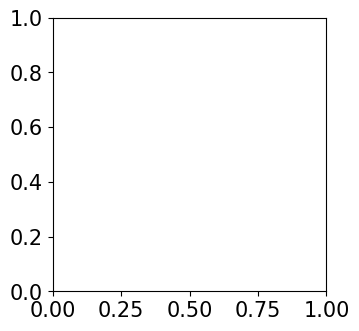

In [41]:
plt.figure(figsize=[12, 4])

plt.subplot(1, 3, 1).set_aspect("equal")
for (vx, vy, vz), (k, c) in zip(vec_seq[:4], enumerate(["k", "b", "r", "m"])):
    print((vx, vy, vz), (k, c))

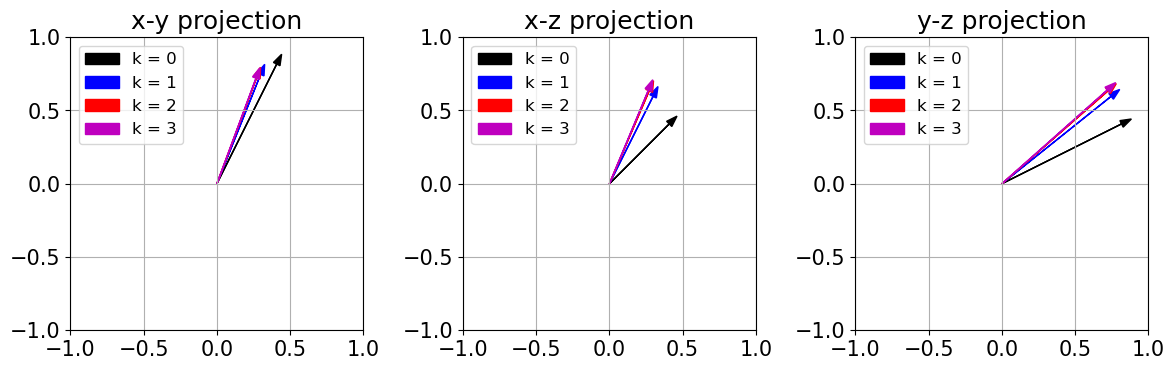

In [43]:
plt.figure(figsize=[12, 4])

plt.subplot(1, 3, 1).set_aspect("equal")
for (vx, vy, vz), (k, c) in zip(vec_seq[:4], enumerate(["k", "b", "r", "m"])):
    plt.arrow(0, 0, vx, vy, color=c, label=f"k = {k}",
              lw=1, length_includes_head=False, head_width=.05)
plt.xlim([-1, 1])
plt.ylim([-1, 1])
plt.grid()
plt.legend(fontsize=12)
plt.title("x-y projection")

plt.subplot(1, 3, 2).set_aspect("equal")
for (vx, vy, vz), (k, c) in zip(vec_seq[:4], enumerate(["k", "b", "r", "m"])):
    plt.arrow(0, 0, vx, vz, color=c, label=f"k = {k}",
              lw=1, length_includes_head=False, head_width=.05)
plt.xlim([-1, 1])
plt.ylim([-1, 1])
plt.grid()
plt.legend(fontsize=12)
plt.title("x-z projection")

plt.subplot(1, 3, 3).set_aspect("equal")
for (vx, vy, vz), (k, c) in zip(vec_seq[:4], enumerate(["k", "b", "r", "m"])):
    plt.arrow(0, 0, vy, vz, color=c, label=f"k = {k}",
              lw=1, length_includes_head=False, head_width=.05)
plt.xlim([-1, 1])
plt.ylim([-1, 1])
plt.grid()
plt.legend(fontsize=12)
plt.title("y-z projection")

plt.tight_layout()
plt.show()

In [10]:
A = [
    [ 1, 0, 1],
    [-1, 2, 2],
    [ 1, 0, 3]
]

[
    eig_max(A, x, predicate=lambda k, lv, dl: k < 100 and abs(dl) > abs(lv[0]) * 1e-10)
    for x in np.random.rand(20, 3)*2 - 1
]

[(3.414213562764359, array([-0.26577653, -0.71948543, -0.64164129]), 43),
 (3.414213562768962, array([-0.26577653, -0.71948543, -0.64164129]), 45),
 (3.414213562847638, array([0.26577653, 0.71948543, 0.64164129]), 41),
 (3.4142135626626007, array([0.26577653, 0.71948543, 0.64164129]), 44),
 (3.4142135628258017, array([-0.26577653, -0.71948543, -0.64164129]), 47),
 (3.4142135626906303, array([0.26577653, 0.71948543, 0.64164129]), 44),
 (3.414213561980477, array([-0.26577653, -0.71948543, -0.64164129]), 43),
 (3.414213562716602, array([-0.26577653, -0.71948543, -0.64164129]), 41),
 (3.4142135627204584, array([-0.26577653, -0.71948543, -0.64164129]), 43),
 (3.4142135620826712, array([-0.26577653, -0.71948543, -0.64164129]), 44),
 (3.414213562671063, array([-0.26577653, -0.71948543, -0.64164129]), 45),
 (3.4142135626828867, array([-0.26577653, -0.71948543, -0.64164129]), 43),
 (3.4142135626745156, array([-0.26577653, -0.71948543, -0.64164129]), 46),
 (3.4142135628046093, array([0.26577653,

In [11]:
def eig_min(A, x0, first_niterations_to_skip=5,
            predicate=lambda k, lv, dl: k < 2**30 and abs(dl) > abs(lv[0]) * 1e-7):
    """Approximate the least dominant eigenvalue of matrix A and the corresponding eigenvector, given the trial vector.
    
    :param A:
        A square matrix whose dominant eigenvalue is sought.
    :param x0:
        A trial vector, i.e., x^(0).
    :param first_niterations_to_skip=int:
        The first n number of iterations to skip calling the predicate function.
    :param predicate=callable:
        A predicate function that accepts
            - k: Current iteration count
            - lv: A pair of lambda estimate and corresponding eigenvector at the current step
            - dl: Difference of lambda in the current step from the one in the previous step
        and must return either True (to keep searching) or False (to terminate).
    """
    A  = np.array(A)
    x0 = np.array(x0)

    def single_step(x0):
        x0 = x0 / np.sqrt(sum(x0 ** 2))                       # renormalization
        x1 = la.solve(A, x0)
        maxi = max(enumerate(x1), key=lambda x: abs(x[1]))[0] # extract index of maximum element in x0
        lam = x0[maxi] / x1[maxi]                             # approximate eigenvalue; x0 will be eigenvector
        return lam, x0, x1

    # iteration
    lam, vec, x0 = single_step(x0)
    k, delta = 1, lam
    while k < first_niterations_to_skip or predicate(k, (lam, vec), delta):
        prev = lam
        lam, vec, x0 = single_step(x0)
        delta = lam - prev
        k += 1
    
    return lam, vec, k

In [12]:
A = [
    [ 1, 0, 1],
    [-1, 2, 2],
    [ 1, 0, 3]
]
x = [ 1, 2, 1] # initial guess

lam_seq = []
vec_seq = []
def pred(k, lv, dl):
    global lam_seq, vec_seq
    lam_seq.append(lv[0])
    vec_seq.append(lv[1])
    print(f"k = {k:3d}, lambda = {lv[0]:.14f}, delta_lambda = {dl:.9e}")
    return k < 100 and abs(dl) > abs(lv[0]) * 1e-10

lam, vec, niterations = eig_min(A, x, predicate=pred, first_niterations_to_skip=1)
print(f"""
lambda = {lam}, eigvec = {vec}, niterations = {niterations}
""")

k =   1, lambda = 1.33333333333333, delta_lambda = 1.333333333e+00
k =   2, lambda = 0.75000000000000, delta_lambda = -5.833333333e-01
k =   3, lambda = 0.61538461538462, delta_lambda = -1.346153846e-01
k =   4, lambda = 0.59090909090909, delta_lambda = -2.447552448e-02
k =   5, lambda = 0.58666666666667, delta_lambda = -4.242424242e-03
k =   6, lambda = 0.58593750000000, delta_lambda = -7.291666667e-04
k =   7, lambda = 0.58581235697940, delta_lambda = -1.251430206e-04
k =   8, lambda = 0.58579088471850, delta_lambda = -2.147226091e-05
k =   9, lambda = 0.58578720062819, delta_lambda = -3.684090309e-06
k =  10, lambda = 0.58578656853726, delta_lambda = -6.320909314e-07
k =  11, lambda = 0.58578646008757, delta_lambda = -1.084496870e-07
k =  12, lambda = 0.58578644148055, delta_lambda = -1.860702559e-08
k =  13, lambda = 0.58578643828809, delta_lambda = -3.192460851e-09
k =  14, lambda = 0.58578643774035, delta_lambda = -5.477397425e-10
k =  15, lambda = 0.58578643764637, delta_lambda 

In [13]:
A @ vec - lam * vec

array([3.53234109e-12, 1.23634991e-11, 1.41295309e-11])

In [14]:
def eig_int(A, x0, mu, first_niterations_to_skip=5,
            predicate=lambda k, lv, dl: k < 2**30 and abs(dl) > abs(lv[0]) * 1e-7):
    """Approximate an eigenvalue of matrix A close to mu and the corresponding eigenvector, given the trial vector.
    
    :param A:
        A square matrix whose dominant eigenvalue is sought.
    :param x0:
        A trial vector, i.e., x^(0).
    :param mu:
        A number between the maximum and minimum eigenvalues
    :param first_niterations_to_skip=int:
        The first n number of iterations to skip calling the predicate function.
    :param predicate=callable:
        A predicate function that accepts
            - k: Current iteration count
            - lv: A pair of lambda estimate and corresponding eigenvector at the current step
            - dl: Difference of lambda in the current step from the one in the previous step
        and must return either True (to keep searching) or False (to terminate).
    """
    lam, vec, k = eig_min(A - mu*np.eye(len(x0)), x0, predicate=predicate,
                          first_niterations_to_skip=first_niterations_to_skip)
    
    return lam + mu, vec, k

In [15]:
A = [
    [ 1, 0, 1],
    [-1, 2, 2],
    [ 1, 0, 3]
]
x = [ 1, 2, 1]

def pred(k, lv, dl):
    assert k <= 100
    return abs(dl) > abs(lv[0]) * 1e-10
    
lam_max, vec_max = eig_max(A, x, predicate=pred)[:2]
lam_min, vec_min = eig_min(A, x, predicate=pred)[:2]
lam_int, vec_int = eig_int(A, x, 0.5*(lam_max + lam_min), predicate=pred)[:2]

print(f"""
lam_int = {lam_int}, eigvec_int = {vec_int}
""")


lam_int = 2.0, eigvec_int = [-0.00000000e+00  1.00000000e+00 -6.25492742e-28]



In [19]:
A @ vec - lam * vec

array([3.53234109e-12, 1.23634991e-11, 1.41295309e-11])

In [3]:
A = [
    [ 1, 0, 1],
    [-1, 2, 2],
    [ 1, 0, 3]
]
w, v = la.eig(A)
v1, v2, v3 = v.T

print(f"""
lambda_1 = {w[0]}, eigvec_1 = {v1}

lambda_2 = {w[1]}, eigvec_2 = {v2}

lambda_3 = {w[2]}, eigvec_3 = {v3}
""")


lambda_1 = 2.0, eigvec_1 = [0. 1. 0.]

lambda_2 = 0.5857864376269051, eigvec_2 = [-0.59306246 -0.76676644  0.24565452]

lambda_3 = 3.414213562373095, eigvec_3 = [-0.26577653 -0.71948543 -0.64164129]



In [14]:
w, v = la.eig(A)
w
print(v)
print(v.T)

[[ 0.         -0.59306246 -0.26577653]
 [ 1.         -0.76676644 -0.71948543]
 [ 0.          0.24565452 -0.64164129]]
[[ 0.          1.          0.        ]
 [-0.59306246 -0.76676644  0.24565452]
 [-0.26577653 -0.71948543 -0.64164129]]


In [22]:
A = [
    [ 1, 2, 3],
    [-1, 3, 1],
    [ 2, 0, 1]
]
w, v = la.eig(A)
v1, v2, v3 = v.T

print(f"""
lambda_1 = {w[0]}, eigvec_1 = {v1}

lambda_2 = {w[1]}, eigvec_2 = {v2}

lambda_3 = {w[2]}, eigvec_3 = {v3}
""")


lambda_1 = 2.999999999999999, eigvec_1 = [ 0.66666667 -0.33333333  0.66666667]

lambda_2 = -1.0000000000000002, eigvec_2 = [-0.66666667 -0.33333333  0.66666667]

lambda_3 = 2.999999999999999, eigvec_3 = [-0.66666667  0.33333333 -0.66666667]



In [23]:
A = [
    [ 0.479477 ,  0.141124,  0.442694,  0.62435 ,  0.0314495, -0.501351],
    [ 0.141124 , -0.419593,  0.157525, -0.262855, -0.805081 ,  0.6414  ],
    [ 0.442694 ,  0.157525, -0.821693,  0.165851, -0.343515 ,  0.503022],
    [ 0.62435  , -0.262855,  0.165851,  0.893587, -0.265796 , -0.791536],
    [ 0.0314495, -0.805081, -0.343515, -0.265796, -0.442857 ,  0.442026],
    [-0.501351 ,  0.6414  ,  0.503022, -0.791536,  0.442026 ,  0.554212],
]
x = np.random.rand(len(A))

# max eigenvalue
l_max, v_max, i_max = eig_max(A, x)

# min eigenvalue
l_min, v_min, i_min = eig_min(A, x)

# intermediate eigenvalues
mu = 0.5 * (l_max - l_min)
l_int1, v_int1, i_int1 = eig_int(A, x, mu)

mu = -0.5 * (l_max - l_int1)
l_int2, v_int2, i_int2 = eig_int(A, x, mu)

mu = 0.5 * (l_int1 - l_min)
l_int3, v_int3, i_int3 = eig_int(A, x, mu)


print("""
eigenvalues found so far:

[{}, {}, {}, {}, {}]
""".format(l_max, l_int2, l_int1, l_int3, l_min))


eigenvalues found so far:

[2.0892058382353285, -0.9916962286969169, 0.7430313182808355, 0.18531178519516167, -0.0356727031936605]



In [24]:
D = np.diagflat([3, 1])
print(f"""D = 
{D}
""")

C = np.array([
    [1,  1], # v1
    [1, -1]  # v2
]).T

M = C @ D @ la.inv(C)
print(f"""M = 
{M}
""")

D = 
[[3 0]
 [0 1]]

M = 
[[2. 1.]
 [1. 2.]]



In [25]:
w, v = la.eig(M)
print(f"""
eigenvalues of M = {w}
""")


eigenvalues of M = [3. 1.]



In [26]:
M20_1 = la.matrix_power(M, 20)
M20_2 = C @ (D**20) @ la.inv(C)

print(f"""
Direct multiply:
{M20_1}

Through diag D :
{M20_2}
""")


Direct multiply:
[[1.7433922e+09 1.7433922e+09]
 [1.7433922e+09 1.7433922e+09]]

Through diag D :
[[1.7433922e+09 1.7433922e+09]
 [1.7433922e+09 1.7433922e+09]]



In [16]:
M = np.array([
    [5, -2],
    [-2, 2]
])

w, v = la.eig(M)
alpha, beta = w
C = v

print(f"""
alpha, beta = {alpha}, {beta}

C =
{C}
""")


alpha, beta = 6.0, 1.0

C =
[[ 0.89442719  0.4472136 ]
 [-0.4472136   0.89442719]]



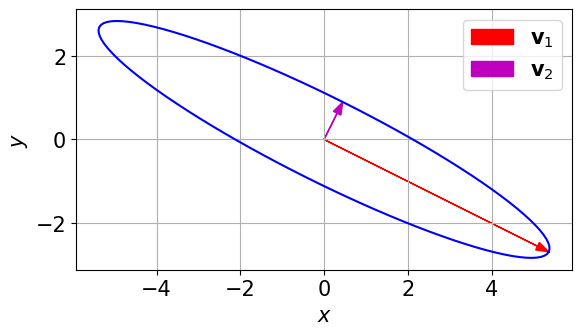

In [72]:
theta = np.linspace(0, 2*np.pi, 101)
x, y = C @ [
    alpha * np.cos(theta),
    beta * np.sin(theta)
]

plt.figure()
plt.subplot().set_aspect("equal")
plt.plot(x, y, "-b")
plt.arrow(0, 0, *(w[0]*v[:, 0]), color="r", shape='full',
          lw=1, length_includes_head=True, head_width=.2,
          label="$\\mathbf{v}_1$")
plt.arrow(0, 0, *(w[1]*v[:, 1]), color="m", shape='full',
          lw=1, length_includes_head=True, head_width=.2,
          label="$\\mathbf{v}_2$")
plt.grid()
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.legend()
plt.show()



In [65]:
C
w


array([6., 1.])

In [66]:
print(v)
print(v[:,1])
print(v[:,0])

[[ 0.89442719  0.4472136 ]
 [-0.4472136   0.89442719]]
[0.4472136  0.89442719]
[ 0.89442719 -0.4472136 ]


In [69]:
M @ C - C @ [[6 , 0], [0, 1]]

array([[0.00000000e+00, 1.66533454e-16],
       [0.00000000e+00, 0.00000000e+00]])